<a href="https://www.kaggle.com/code/ranamudassarrasool/pandas-toolkit-for-beginners-part-2-ipynb?scriptVersionId=224988532" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:white;background-color:GREEN;padding:3%;border-radius:150px 150px;font-size:2.5em;text-align:center">Pandas toolkit Part 2</div>

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    6
2    5
3    4
4    3
5    1
6    2
7    5
8    2
9    3
dtype: int64

In [3]:
s.value_counts()

2    3
5    2
3    2
6    1
4    1
1    1
Name: count, dtype: int64

In [4]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [5]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.144863,0.104642,-0.640524,0.592744
1,-0.110790,-0.332942,0.996548,-0.641026
2,-0.655738,1.372478,-0.428233,0.234538
3,0.622647,-0.138324,1.644986,0.175983
4,2.206759,-1.046816,0.458715,0.846764
5,0.389004,-0.781743,0.230408,-1.127709
6,0.365918,-0.380845,-1.105438,-1.709844
7,-0.499814,0.404766,-0.036266,0.240490
8,-1.666256,0.076777,-0.032800,-2.597442
9,0.151888,3.251139,-1.788414,0.378117


In [6]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.144863,0.104642,-0.640524,0.592744
1,-0.110790,-0.332942,0.996548,-0.641026
2,-0.655738,1.372478,-0.428233,0.234538
3,0.622647,-0.138324,1.644986,0.175983
4,2.206759,-1.046816,0.458715,0.846764
5,0.389004,-0.781743,0.230408,-1.127709
6,0.365918,-0.380845,-1.105438,-1.709844
7,-0.499814,0.404766,-0.036266,0.240490
8,-1.666256,0.076777,-0.032800,-2.597442
9,0.151888,3.251139,-1.788414,0.378117


In [7]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [8]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [9]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [10]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [11]:
df = pd.DataFrame({
    
"A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
"B": ["one", "one", "two", "three", "two", "two", "one", "three"],
"C": np.random.randn(8),
"D": np.random.randn(8)
    
     })
df.head()

,A,B,C,D
0,foo,one,0.774457,-0.545719
1,bar,one,1.049220,-0.004090
2,foo,two,0.402078,-0.889054
3,bar,three,1.043126,-0.478360
4,foo,two,1.176431,0.029410


In [12]:
df.groupby("A").sum()

,B,C,D
A,,,
bar,onethreetwo,1.548766,-0.517768
foo,onetwotwoonethree,2.032087,-0.114344


In [13]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    1.049220 -0.004090
    three  1.043126 -0.478360
    two   -0.543580 -0.035317
foo one    1.639508 -0.373353
    three -1.185930  1.118653
    two    1.578509 -0.859644

In [14]:
tuples = list(zip(*[
["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
["one", "two", "one", "two", "one", "two", "one", "two"]
]))

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.443660 -1.082782
      two     0.546347 -2.281212
baz   one     0.462506  0.905005
      two     0.562857 -0.154475

In [15]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.443660
               B   -1.082782
       two     A    0.546347
               B   -2.281212
baz    one     A    0.462506
               B    0.905005
       two     A    0.562857
               B   -0.154475
dtype: float64

In [16]:
stacked.unstack()

A         B
first second                    
bar   one     0.443660 -1.082782
      two     0.546347 -2.281212
baz   one     0.462506  0.905005
      two     0.562857 -0.154475

In [17]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.443660  0.546347
      B -1.082782 -2.281212
baz   A  0.462506  0.562857
      B  0.905005 -0.154475

In [18]:
df = pd.DataFrame({
    
"A": ["one", "one", "two", "three"] * 3,
"B": ["A", "B", "C"] * 4,
"C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
"D": np.random.randn(12),
"E": np.random.randn(12)
    
})
df

,A,B,C,D,E
0,one,A,foo,-0.181012,-0.492601
1,one,B,foo,0.732625,-0.016352
2,two,C,foo,-0.733470,0.008576
3,three,A,bar,1.529627,0.626302
4,one,B,bar,-1.138930,0.650427
5,one,C,bar,-0.632812,-1.585580
6,two,A,foo,0.088103,-0.563276
7,three,B,foo,-0.679763,0.662725
8,one,C,foo,-0.963360,-1.350596
9,one,A,bar,0.272395,0.229687


In [19]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


C             bar       foo
A     B                    
one   A  0.272395 -0.181012
      B -1.138930  0.732625
      C -0.632812 -0.963360
three A  1.529627       NaN
      B       NaN -0.679763
      C -0.366425       NaN
two   A       NaN  0.088103
      B -0.321938       NaN
      C       NaN -0.733470

In [20]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

<ipython-input-20-ea0410cbc73d>:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  rng = pd.date_range("1/1/2012", periods=100, freq="S")


2012-01-01    22610
Freq: 5min, dtype: int64

In [21]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -1.590329
2012-03-07   -0.969024
2012-03-08   -0.367106
2012-03-09    1.937152
2012-03-10   -0.281871
Freq: D, dtype: float64

In [22]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00   -1.590329
2012-03-07 00:00:00+00:00   -0.969024
2012-03-08 00:00:00+00:00   -0.367106
2012-03-09 00:00:00+00:00    1.937152
2012-03-10 00:00:00+00:00   -0.281871
Freq: D, dtype: float64

In [23]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

<ipython-input-23-713be97bb676>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rng = pd.date_range("1/1/2012", periods=5, freq="M")


2012-01-31    0.923064
2012-02-29   -0.129573
2012-03-31    0.253516
2012-04-30    1.177183
2012-05-31   -0.990832
Freq: ME, dtype: float64

In [24]:
ps = ts.to_period()
ps

2012-01    0.923064
2012-02   -0.129573
2012-03    0.253516
2012-04    1.177183
2012-05   -0.990832
Freq: M, dtype: float64

In [25]:
ps.to_timestamp()

2012-01-01    0.923064
2012-02-01   -0.129573
2012-03-01    0.253516
2012-04-01    1.177183
2012-05-01   -0.990832
Freq: MS, dtype: float64

In [26]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

<ipython-input-26-7eef4fe49a0a>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9


1990-03-01 09:00   -0.290772
1990-06-01 09:00   -0.435405
1990-09-01 09:00    1.125700
1990-12-01 09:00   -0.088439
1991-03-01 09:00    1.097651
Freq: h, dtype: float64

In [27]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]})
df.head()

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a


In [28]:
df["grade"] = df["raw_grade"].astype("category")
In [125]: df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [29]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

df["grade"]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [30]:
df.sort_values(by="grade")

,id,raw_grade,grade
0,1,a,NaN
1,2,b,NaN
2,3,b,NaN
3,4,a,NaN
4,5,a,NaN
5,6,e,NaN


In [31]:
df.groupby("grade").size()

<ipython-input-31-586392de31f1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("grade").size()


grade
very bad     0
bad          0
medium       0
good         0
very good    0
dtype: int64

In [32]:
import matplotlib.pyplot as plt
plt.close("all")

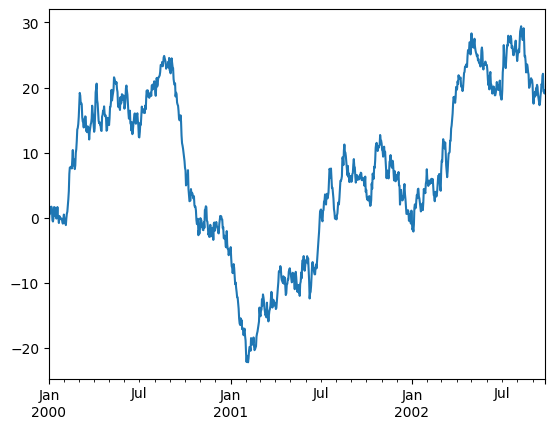

In [33]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000",periods=1000))
ts = ts.cumsum()
ts.plot();

<Figure size 640x480 with 0 Axes>

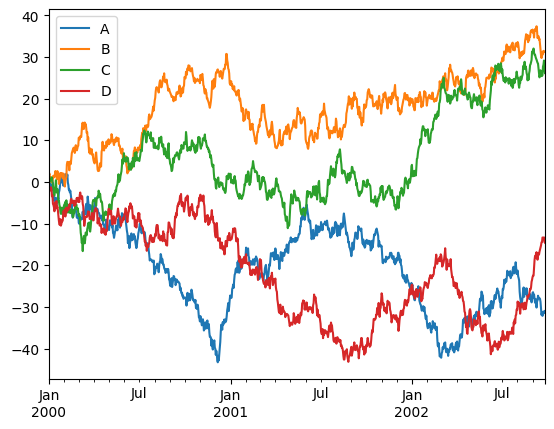

In [34]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"])
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

In [35]:
df.to_csv("foo.csv")
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.607278,1.573860,0.302731,-0.967609
1,2000-01-02,-1.138683,2.050536,-0.119740,-2.101317
2,2000-01-03,-0.380670,0.616894,0.285018,-1.987239
3,2000-01-04,-1.265054,1.147687,0.589552,-1.728856
4,2000-01-05,-0.817539,0.179374,0.402518,-1.232418
...,...,...,...,...,...
995,2002-09-22,-31.248851,31.340004,27.754629,-13.354083
996,2002-09-23,-31.068798,31.506481,28.197807,-13.347186
997,2002-09-24,-31.100439,31.447413,29.183839,-13.272272
998,2002-09-25,-31.458651,31.184239,27.367809,-14.375231


In [36]:
df.to_hdf("foo.h5", "df")
pd.read_hdf("foo.h5", "df")

<ipython-input-36-196c5bd69001>:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df.to_hdf("foo.h5", "df")


,A,B,C,D
2000-01-01,-1.607278,1.573860,0.302731,-0.967609
2000-01-02,-1.138683,2.050536,-0.119740,-2.101317
2000-01-03,-0.380670,0.616894,0.285018,-1.987239
2000-01-04,-1.265054,1.147687,0.589552,-1.728856
2000-01-05,-0.817539,0.179374,0.402518,-1.232418
...,...,...,...,...
2002-09-22,-31.248851,31.340004,27.754629,-13.354083
2002-09-23,-31.068798,31.506481,28.197807,-13.347186
2002-09-24,-31.100439,31.447413,29.183839,-13.272272
2002-09-25,-31.458651,31.184239,27.367809,-14.375231


In [37]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.607278,1.573860,0.302731,-0.967609
1,2000-01-02,-1.138683,2.050536,-0.119740,-2.101317
2,2000-01-03,-0.380670,0.616894,0.285018,-1.987239
3,2000-01-04,-1.265054,1.147687,0.589552,-1.728856
4,2000-01-05,-0.817539,0.179374,0.402518,-1.232418
...,...,...,...,...,...
995,2002-09-22,-31.248851,31.340004,27.754629,-13.354083
996,2002-09-23,-31.068798,31.506481,28.197807,-13.347186
997,2002-09-24,-31.100439,31.447413,29.183839,-13.272272
998,2002-09-25,-31.458651,31.184239,27.367809,-14.375231


In [38]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a    0.185484
b    0.434806
c    1.159452
d   -1.097602
e   -0.065928
dtype: float64

In [39]:
d = {"b": 1, "a": 0, "c": 2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

In [40]:
d = {"a": 0.0, "b": 1.0, "c": 2.0}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [41]:
pd.Series(d, index=["b", "c", "d", "a"])

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [42]:
pd.Series(5.0, index=["a", "b", "c", "d", "e"])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

In [43]:
s[0]

<ipython-input-43-c9c96910e542>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[0]


0.18548445225430568

In [44]:
s[:3]

a    0.185484
b    0.434806
c    1.159452
dtype: float64

In [45]:
s[s > s.median()]

b    0.434806
c    1.159452
dtype: float64

In [46]:
s[[4, 3, 1]]

<ipython-input-46-d3ca9c3eebed>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[[4, 3, 1]]


e   -0.065928
d   -1.097602
b    0.434806
dtype: float64

In [47]:
np.exp(s)

a    1.203801
b    1.544664
c    3.188185
d    0.333670
e    0.936198
dtype: float64

In [48]:
s.array

<NumpyExtensionArray>
[ 0.18548445225430568,  0.43480643093852744,   1.1594516578842906,
  -1.0976020822169403, -0.06592838038202205]
Length: 5, dtype: float64

In [49]:
s.to_numpy()

array([ 0.18548445,  0.43480643,  1.15945166, -1.09760208, -0.06592838])

In [50]:
s["a"]

0.18548445225430568

In [51]:
s["e"] = 12.0
s

a     0.185484
b     0.434806
c     1.159452
d    -1.097602
e    12.000000
dtype: float64

In [52]:
np.exp(s)

a         1.203801
b         1.544664
c         3.188185
d         0.333670
e    162754.791419
dtype: float64

In [53]:
s[1:] + s[:-1]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


a         NaN
b    0.869613
c    2.318903
d   -2.195204
e         NaN
dtype: float64

In [54]:
s = pd.Series(np.random.randn(5), name="something")
s

0   -0.965852
1    1.084084
2   -0.150943
3    0.286458
4   -0.151099
Name: something, dtype: float64

In [55]:
s2 = s.rename("different")
s2.name

'different'

In [56]:
d = {
"one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
"two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

df = pd.DataFrame(d)
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [57]:
pd.DataFrame(d, index=["d", "b", "a"])

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [58]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [59]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [60]:
df.columns

Index(['one', 'two'], dtype='object')

In [61]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [62]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [63]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [64]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [65]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


In [66]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
pd.DataFrame(data2)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,a,b,c
0,1,2,NaN
1,5,10,20.0


In [67]:
pd.DataFrame(data2, index=["first", "second"])

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,a,b,c
first,1,2,NaN
second,5,10,20.0


In [68]:
pd.DataFrame(data2, columns=["a", "b"])

,a,b
0,1,2
1,5,10


In [69]:
pd.DataFrame({
    
("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
("b", "b"): {("A", "D"): 9, ("A", "B"): 10}
    
})

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [70]:
from collections import namedtuple
Point = namedtuple("Point", "x y")
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [71]:
Point3D = namedtuple("Point3D", "x y z")

In [72]:
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)])

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


In [73]:
from dataclasses import make_dataclass
Point = make_dataclass("Point", [("x", int), ("y", int)])
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [74]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [75]:
pd.DataFrame.from_dict(
dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
orient="index",
columns=["one", "two", "three"],
)

,one,two,three
A,1,2,3
B,4,5,6


In [76]:
pd.DataFrame.from_records(data, index="C")

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


In [77]:
df["three"] = df["one"] * df["two"]
df["flag"] = df["one"] > 2
df

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [78]:
del df["two"]
three = df.pop("three")
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [79]:
df["foo"] = "bar"
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [80]:
df["one_trunc"] = df["one"][:2]
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [81]:
df.insert(1, "bar", df["one"])
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


In [82]:
iris = pd.read_csv("/kaggle/input/iris/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [83]:
iris.assign(sepal_ratio=iris["SepalWidthCm"] / iris["SepalLengthCm"]).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [84]:
iris.assign(sepal_ratio=lambda x: (x["SepalWidthCm"] / x["SepalLengthCm"])).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


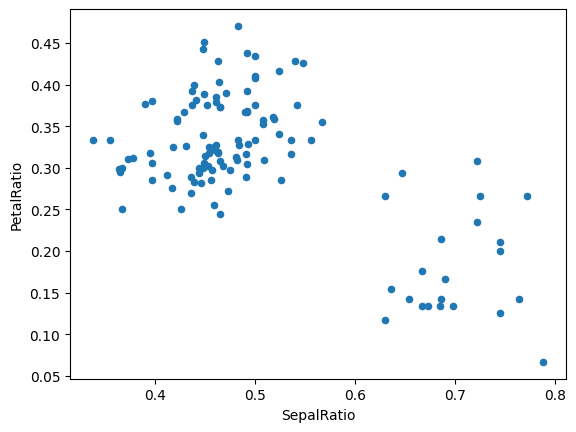

In [85]:
(iris.query("SepalLengthCm > 5").assign(
SepalRatio=lambda x: x.SepalWidthCm / x.SepalLengthCm,
PetalRatio=lambda x: x.PetalWidthCm / x.PetalLengthCm,
).plot(kind="scatter", x="SepalRatio", y="PetalRatio"));

In [86]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In [87]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])
df + df2

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,A,B,C,D
0,2.203260,-1.590520,0.318847,NaN
1,-0.204728,1.966591,-0.721966,NaN
2,-0.586179,-1.074615,-2.609258,NaN
3,-0.506287,-0.200549,-2.467668,NaN
4,-0.180861,0.187786,0.804647,NaN
5,0.381152,-0.676283,-1.692685,NaN
6,0.936843,0.047961,-0.182888,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [88]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [89]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [90]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [91]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


In [92]:
np.exp(df)

,A,B,C,D
0,3.476569,0.425254,2.484605,2.824355
1,0.386085,3.389356,0.487732,1.540244
2,0.935144,0.936807,0.060325,0.607053
3,0.800916,1.048152,0.144919,1.219950
4,1.158943,1.534572,0.562689,2.707752
5,3.347170,0.449840,0.691531,0.534771
6,1.321001,0.733577,0.375857,1.277399
7,1.539544,1.038476,6.213968,0.975926
8,2.343997,1.203697,0.179875,1.324867
9,0.673161,0.481163,0.311863,1.832073


In [93]:
ser = pd.Series([1, 2, 3, 4])
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

In [94]:
ser1 = pd.Series([1, 2, 3], index=["a", "b", "c"])
ser2 = pd.Series([1, 3, 5], index=["b", "a", "c"])
ser1

a    1
b    2
c    3
dtype: int64

In [95]:
np.remainder(ser1, ser2)

a    1
b    0
c    3
dtype: int64

In [96]:
ser3 = pd.Series([2, 4, 6], index=["b", "c", "d"])
np.remainder(ser1, ser3)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


a    NaN
b    0.0
c    3.0
d    NaN
dtype: float64

In [97]:
ser = pd.Series([1, 2, 3])
idx = pd.Index([4, 5, 6])
np.maximum(ser, idx)

0    4
1    5
2    6
dtype: int64

In [98]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.161950,2.301543,0.282946,1.488787,-0.244015,0.112985,-0.182163,0.109492,1.156987,-0.179465,-1.110148,-0.321877
1,-1.014621,0.570571,1.007004,0.944324,-0.468355,1.928170,-1.899736,0.281035,-0.798506,0.301293,-0.034629,-0.687164
2,-1.383166,-0.099977,-2.019019,0.688014,0.773268,-1.917627,0.496252,-0.075113,0.200687,0.835201,-0.490162,-0.165136


In [99]:
pd.set_option("display.width", 40) # default is 80
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.212668,1.004261,0.752532,0.492622,-0.333077,-0.702989,-0.543813,0.216172,1.367188,1.346700,-0.448524,0.914627
1,-1.502418,0.682919,-0.561594,-0.564409,-0.076410,-0.435083,0.343883,-0.836726,0.103369,0.880738,-0.172911,0.523240
2,1.550432,-0.377348,0.862830,0.662291,0.782677,-0.213039,1.517941,-0.117225,0.780594,0.845862,-0.399876,1.224951


In [100]:
datafile = {
"filename": ["filename_01", "filename_02"],
"path": [
"media/user_name/storage/folder_01/filename_01",
"media/user_name/storage/folder_02/filename_02",]
}

pd.set_option("display.max_colwidth", 30)
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/fo...
1,filename_02,media/user_name/storage/fo...


In [101]:
pd.set_option("display.max_colwidth", 100)
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/folder_01/filename_01
1,filename_02,media/user_name/storage/folder_02/filename_02


In [102]:
df = pd.DataFrame({"foo1": np.random.randn(5), "foo2": np.random.randn(5)})
df

,foo1,foo2
0,-0.468333,-0.115320
1,-0.572350,1.239727
2,-0.307818,0.392555
3,0.718771,-0.012399
4,2.406303,1.572087


In [103]:
index = pd.date_range("1/1/2000", periods=8)
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=["A", "B", "C"])

In [104]:
long_series = pd.Series(np.random.randn(1000))
long_series.head()

0   -1.115618
1   -1.566529
2    1.160500
3    0.484726
4   -1.520031
dtype: float64

In [105]:
df[:2]

,A,B,C
2000-01-01,-2.193416,0.609421,0.129965
2000-01-02,-0.204260,1.153754,0.626445


In [106]:
df.columns = [x.lower() for x in df.columns]
df

,a,b,c
2000-01-01,-2.193416,0.609421,0.129965
2000-01-02,-0.204260,1.153754,0.626445
2000-01-03,0.454543,0.322074,-0.035607
2000-01-04,0.012985,1.335302,1.239055
2000-01-05,1.529567,-1.255151,-0.624949
2000-01-06,0.581197,-0.216577,2.091147
2000-01-07,0.053128,-0.155466,-0.325081
2000-01-08,2.197076,-0.485600,0.831867


In [107]:
s.array

<NumpyExtensionArray>
[ -1.3642294002820028,
   2.3713720254353743,
   1.2970222764417942,
 -0.19413138996934576,
  0.08950073562668118]
Length: 5, dtype: float64

In [108]:
s.index.array

<NumpyExtensionArray>
['a', 'b', 'c', 'd', 'e']
Length: 5, dtype: object

In [109]:
s.to_numpy()

array([-1.3642294 ,  2.37137203,  1.29702228, -0.19413139,  0.08950074])

In [110]:
np.asarray(s)

array([-1.3642294 ,  2.37137203,  1.29702228, -0.19413139,  0.08950074])

In [111]:
ser = pd.Series(pd.date_range("2000", periods=2, tz="CET"))
ser.to_numpy(dtype=object)

array([Timestamp('2000-01-01 00:00:00+0100', tz='CET'),
       Timestamp('2000-01-02 00:00:00+0100', tz='CET')], dtype=object)

In [112]:
pd.set_option("compute.use_bottleneck", False)
pd.set_option("compute.use_numexpr", False)

In [113]:
df = pd.DataFrame({
"one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
"two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
"three": pd.Series(np.random.randn(3), index=["b", "c", "d"]),
})

df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,one,two,three
a,0.042038,-0.252285,NaN
b,-1.083235,1.777140,0.386280
c,-0.489875,-0.453889,-0.892333
d,NaN,-1.308716,0.704294


In [114]:
row = df.iloc[1]
column = df["two"]
df.sub(row, axis="columns")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,one,two,three
a,1.125273,-2.029425,NaN
b,0.000000,0.000000,0.000000
c,0.593361,-2.231029,-1.278613
d,NaN,-3.085856,0.318014


In [115]:
df.sub(row, axis=1)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,one,two,three
a,1.125273,-2.029425,NaN
b,0.000000,0.000000,0.000000
c,0.593361,-2.231029,-1.278613
d,NaN,-3.085856,0.318014


In [116]:
df.sub(column, axis="index")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,one,two,three
a,0.294323,0.0,NaN
b,-2.860375,0.0,-1.390860
c,-0.035986,0.0,-0.438444
d,NaN,0.0,2.013010


In [117]:
df.sub(column, axis=0)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,one,two,three
a,0.294323,0.0,NaN
b,-2.860375,0.0,-1.390860
c,-0.035986,0.0,-0.438444
d,NaN,0.0,2.013010


In [118]:
dfmi = df.copy()
In [27]: dfmi.index = pd.MultiIndex.from_tuples(
[(1, "a"), (1, "b"), (1, "c"), (2, "a")], names=["first", "second"]
)

dfmi.sub(column, axis=0, level="second")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


one       two  \
first second                       
1     a       0.294323  0.000000   
      b      -2.860375  0.000000   
      c      -0.035986  0.000000   
2     a            NaN -1.056431   

                 three  
first second            
1     a            NaN  
      b      -1.390860  
      c      -0.438444  
2     a       0.956579

In [119]:
pd.Series(np.arange(10))

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [120]:
div, rem = divmod(df,3)
div

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,one,two,three
a,0.0,-1.0,NaN
b,-1.0,0.0,0.0
c,-1.0,-1.0,-1.0
d,NaN,-1.0,0.0


In [121]:
idx = pd.Index(np.arange(10))
idx

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [122]:
div, rem = divmod(idx, 3)
div

Index([0, 0, 0, 1, 1, 1, 2, 2, 2, 3], dtype='int64')

In [123]:
df.gt(df)

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,one,two,three
a,False,False,False
b,False,False,False
c,False,False,False
d,False,False,False


In [124]:
(df > 0).all()

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


one      False
two      False
three    False
dtype: bool

In [125]:
(df > 0).any()

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


one      True
two      True
three    True
dtype: bool

In [126]:
(df > 0).any().any()

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


True

In [127]:
pd.DataFrame(columns=list("ABC")).empty

True

In [128]:
(df + df == df * 2).all()

one      False
two       True
three    False
dtype: bool

In [129]:
(df + df).equals(df * 2)

True

In [130]:
df1 = pd.DataFrame({"col": ["foo", 0, np.nan]})
df2 = pd.DataFrame({"col": [np.nan, 0, "foo"]}, index=[2, 1, 0])
df1.equals(df2)

False

In [131]:
pd.Series(["foo", "bar", "baz"]) == "foo"

0     True
1    False
2    False
dtype: bool

In [132]:
pd.Index(["foo", "bar", "baz"]) == "foo"

array([ True, False, False])

In [133]:
pd.Series(["foo", "bar", "baz"]) == pd.Index(["foo", "bar", "qux"])

0     True
1     True
2    False
dtype: bool

In [134]:
pd.Series(["foo", "bar", "baz"]) == np.array(["foo", "bar", "qux"])

0     True
1     True
2    False
dtype: bool

In [135]:
np.array([1, 2, 3]) == np.array([2])

array([False,  True, False])

In [136]:
df1 = pd.DataFrame(
{"A": [1.0, np.nan, 3.0, 5.0, np.nan], "B": [np.nan, 2.0, 3.0, np.nan, 6.0]}
)

df2 = pd.DataFrame({
"A": [5.0, 2.0, 4.0, np.nan, 3.0, 7.0],
"B": [np.nan, np.nan, 3.0, 4.0, 6.0, 8.0],
})

df1

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,A,B
0,1.0,NaN
1,NaN,2.0
2,3.0,3.0
3,5.0,NaN
4,NaN,6.0


In [137]:
df1.combine_first(df2)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


In [138]:
def combiner(x, y):
    return np.where(pd.isna(x), y, x)
df1.combine(df2, combiner)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


In [139]:
df.sum(0, skipna=False)

one          NaN
two     -0.23775
three        NaN
dtype: float64

In [140]:
df.sum(axis=1, skipna=True)

a   -0.210248
b    1.080185
c   -1.836096
d   -0.604422
dtype: float64

In [141]:
ts_stand = (df - df.mean()) / df.std()
ts_stand.std()

one      1.0
two      1.0
three    1.0
dtype: float64

In [142]:
xs_stand = df.sub(df.mean(1), axis=0).div(df.std(1), axis=0)
xs_stand.std(1)

a    1.0
b    1.0
c    1.0
d    1.0
dtype: float64

In [143]:
np.mean(df["one"])

-0.5103573404827569

In [144]:
np.mean(df["one"].to_numpy())

nan

In [145]:
series = pd.Series(np.random.randn(500))
series[20:500] = np.nan
series[10:20] = 5
series.nunique()

11

In [146]:
series = pd.Series(np.random.randn(1000))
series[::2] = np.nan
series.describe()

count    500.000000
mean      -0.002480
std        0.993463
min       -3.147038
25%       -0.716549
50%        0.041787
75%        0.647769
max        2.910399
dtype: float64

In [147]:
frame = pd.DataFrame(np.random.randn(1000, 5), columns=["a", "b", "c", "d", "e"])
frame.iloc[::2] = np.nan
frame.describe()

,a,b,c,d,e
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.048315,-0.018360,-0.022478,0.047157,-0.044421
std,1.010086,0.988455,0.988734,0.965468,0.993212
min,-3.257713,-3.343525,-2.528243,-3.027123,-3.081140
25%,-0.672789,-0.737152,-0.673591,-0.540865,-0.686730
50%,-0.033547,0.019994,-0.069616,0.049203,0.003130
75%,0.540146,0.599521,0.602260,0.667945,0.601932
max,2.485409,3.098143,2.843806,3.051266,3.557113


In [148]:
series.describe(percentiles=[0.05, 0.25, 0.75, 0.95])

count    500.000000
mean      -0.002480
std        0.993463
min       -3.147038
5%        -1.752116
25%       -0.716549
50%        0.041787
75%        0.647769
95%        1.638198
max        2.910399
dtype: float64

In [149]:
s = pd.Series(["a", "a", "b", "b", "a", "a", np.nan, "c", "d", "a"])
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object